In [3]:
from hidromet import config
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

#### Preenchimento das falhas

O preenchimento de falhas irá considerar todos os arquivos csv disponíveis no diretório `merge-e-posto`, que contém as séries do próprio posto e a série calculada de satélite, esta última indexada pela coluna `merge`.

A seguir, são apresentadas visualizações destas séries após preenchimento. Todas as séries preenchidas são exportadas para o diretório `series-preenchidas`.

In [4]:
series_com_merge = list(config.dir_merge_posto.glob("*.csv"))

/tmp/ipykernel_2113873/328476946.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=2, figsize=(24, 8))


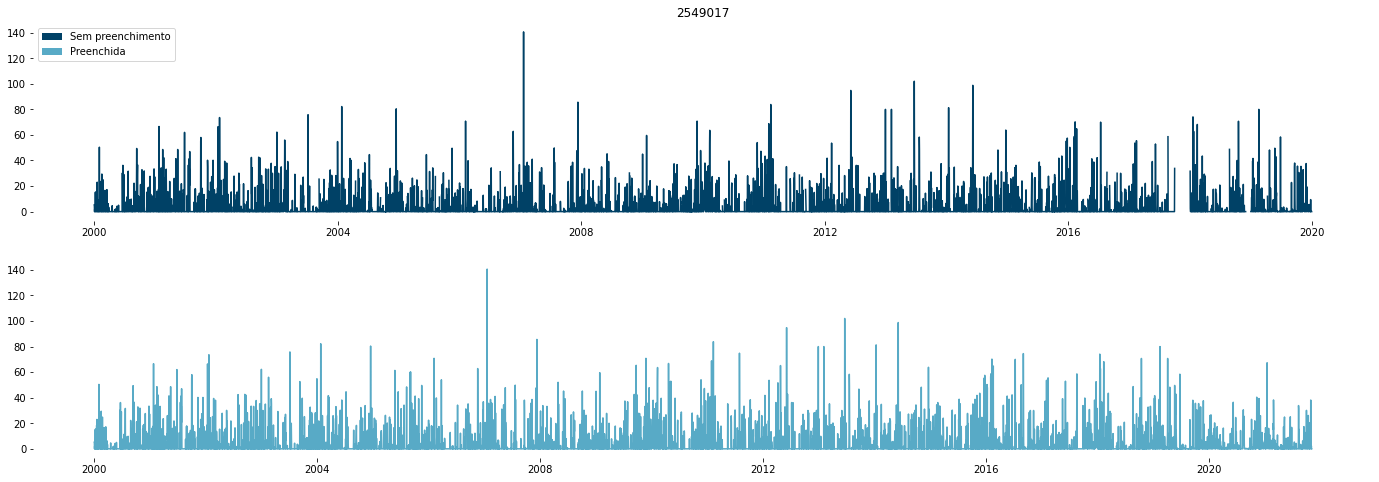

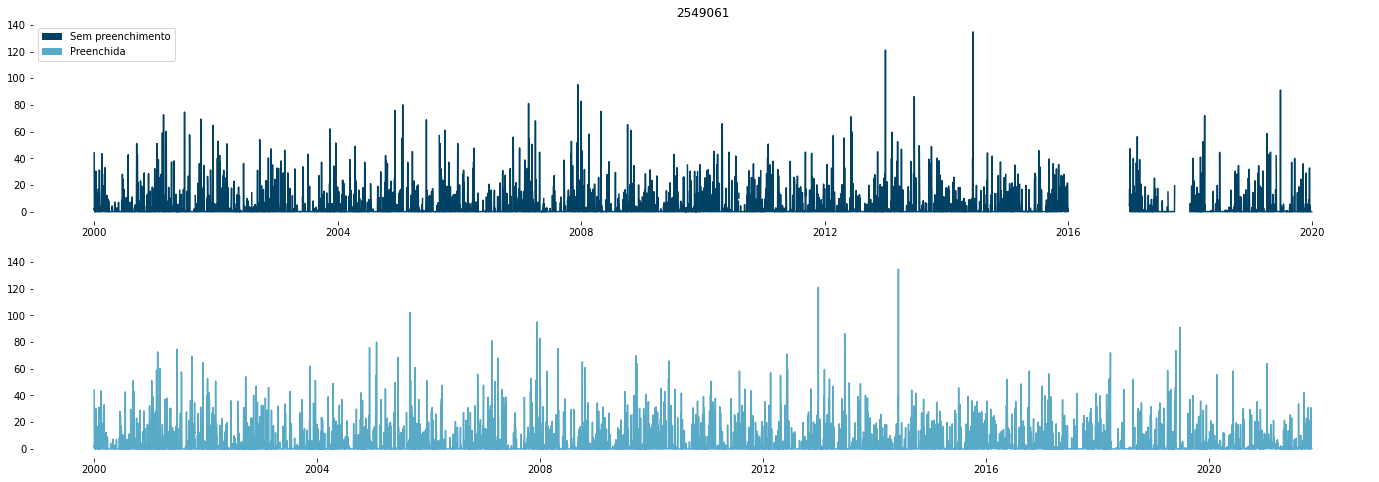

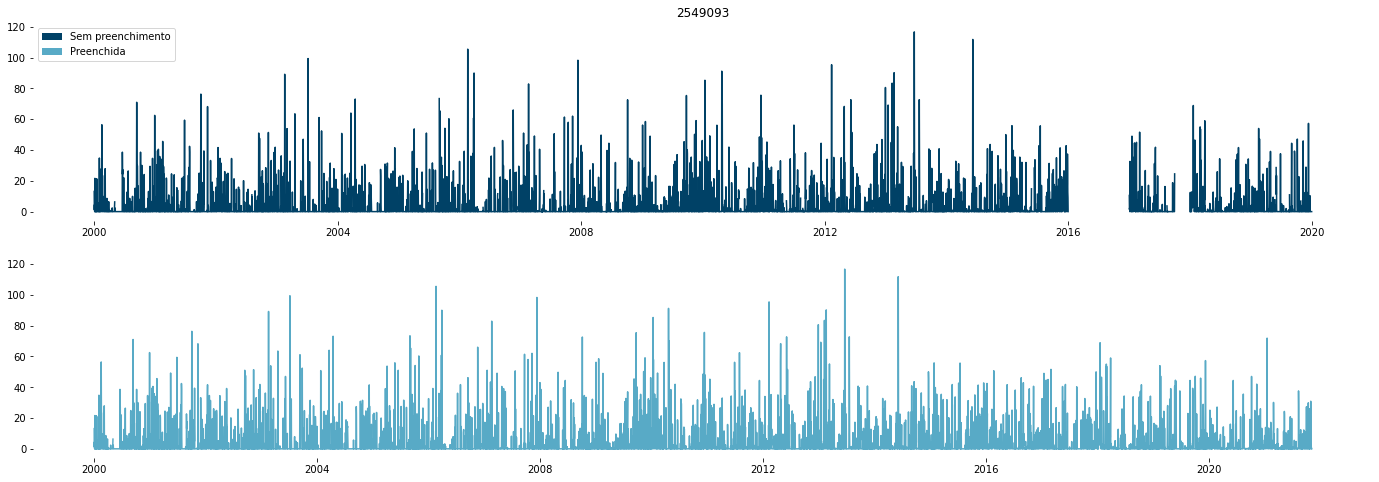

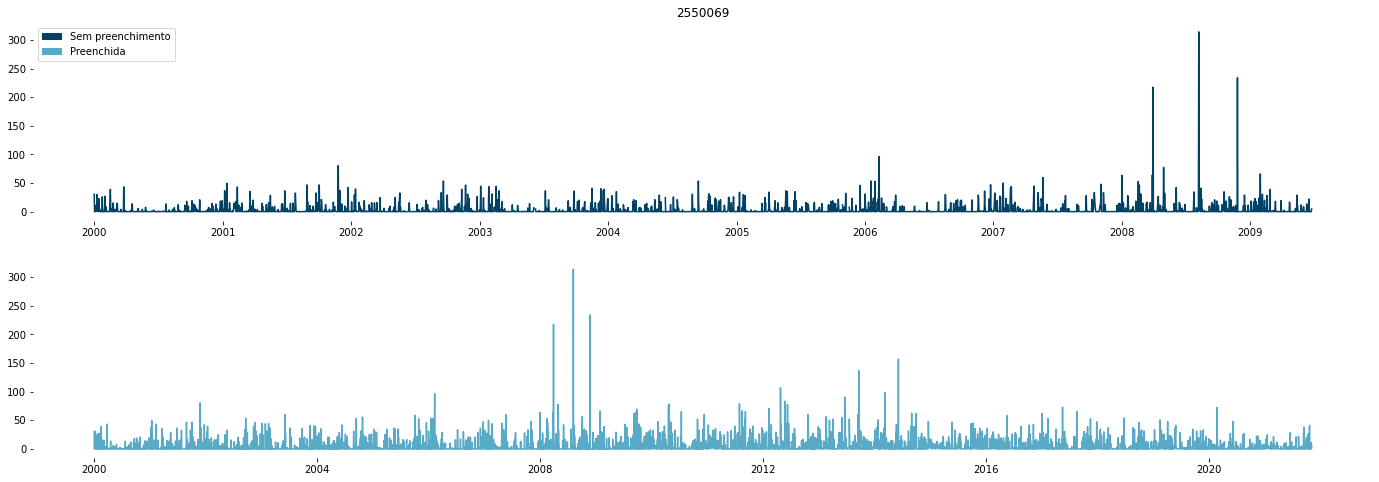

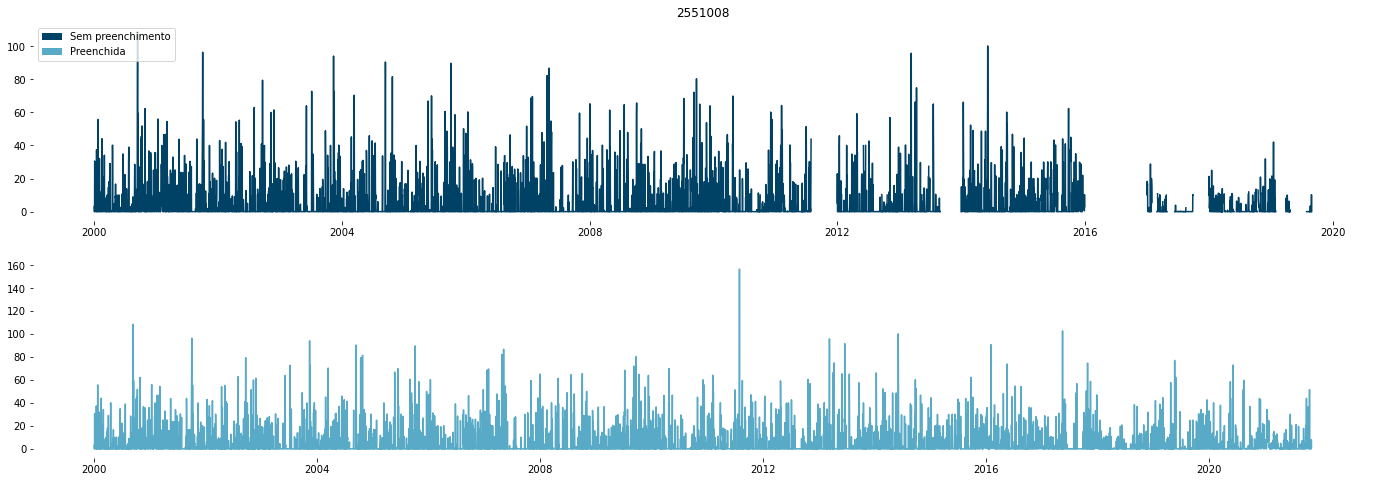

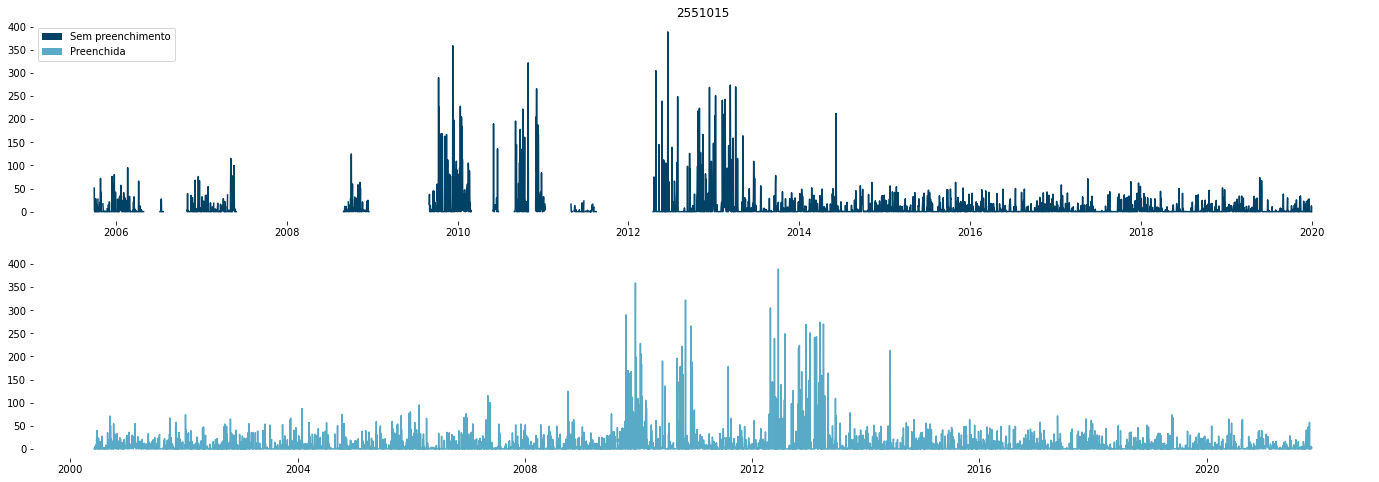

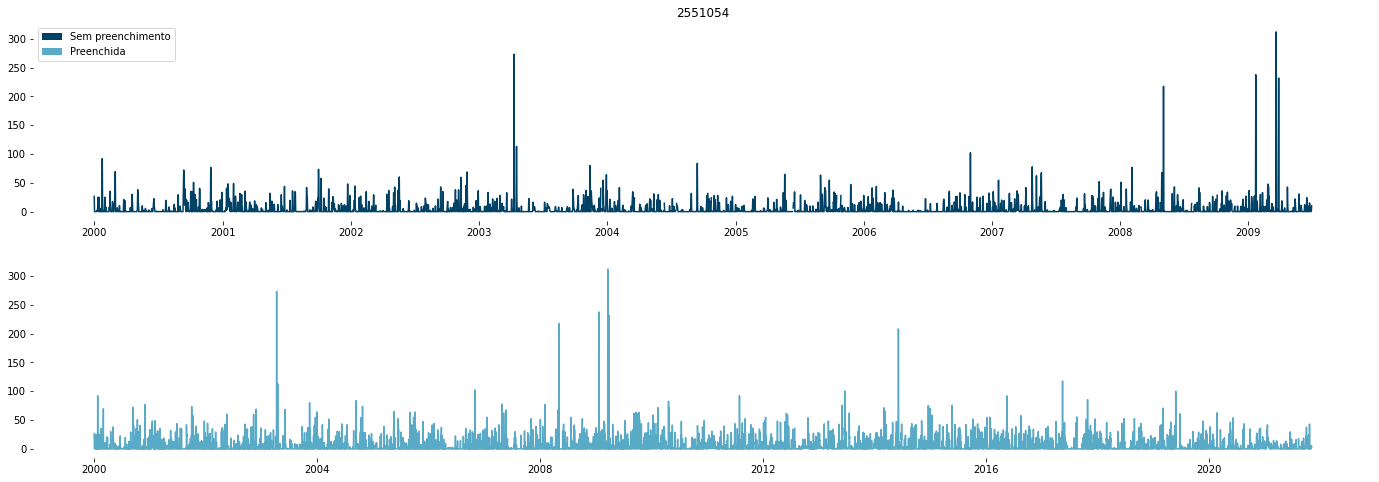

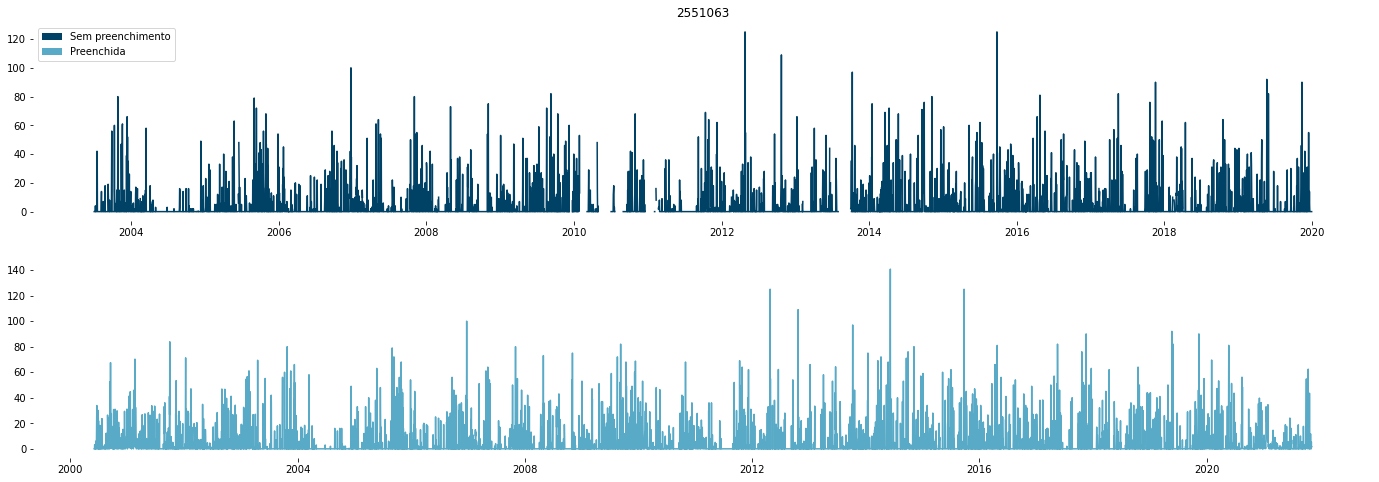

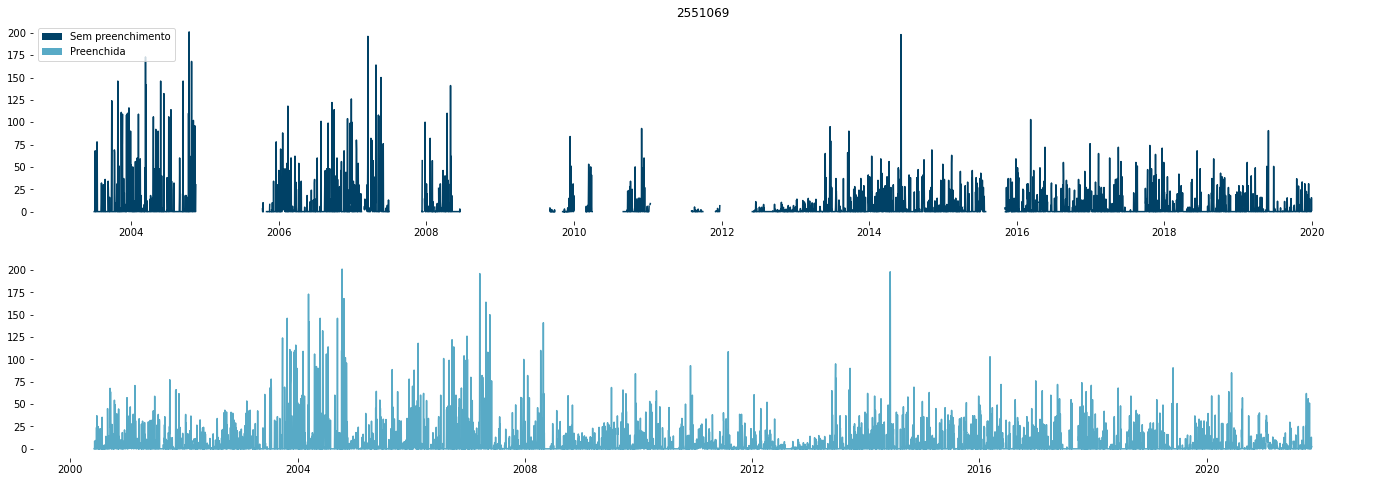

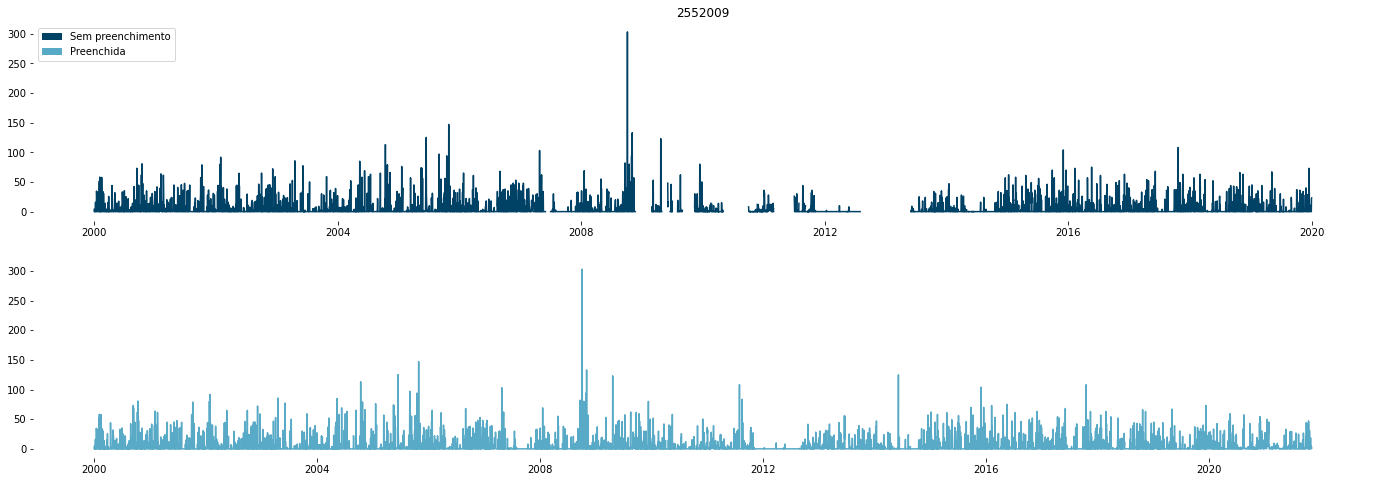

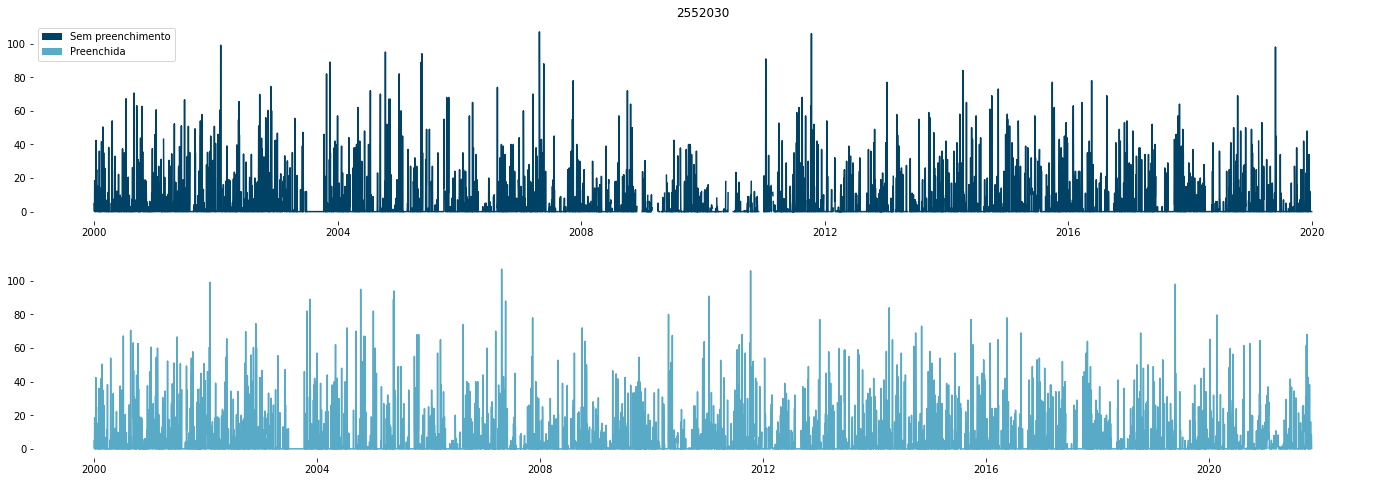

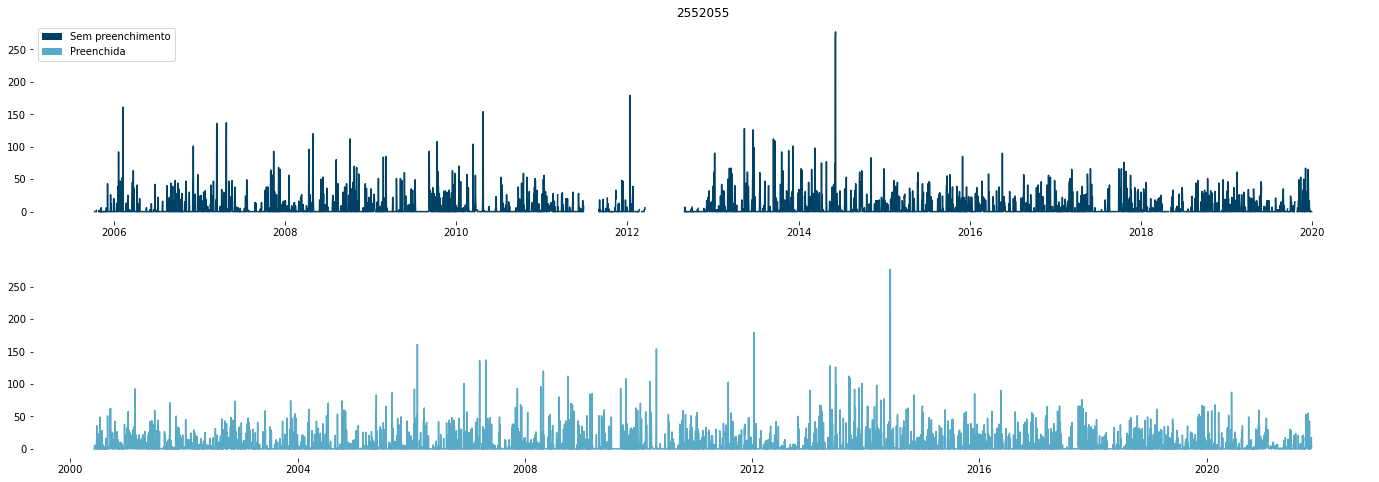

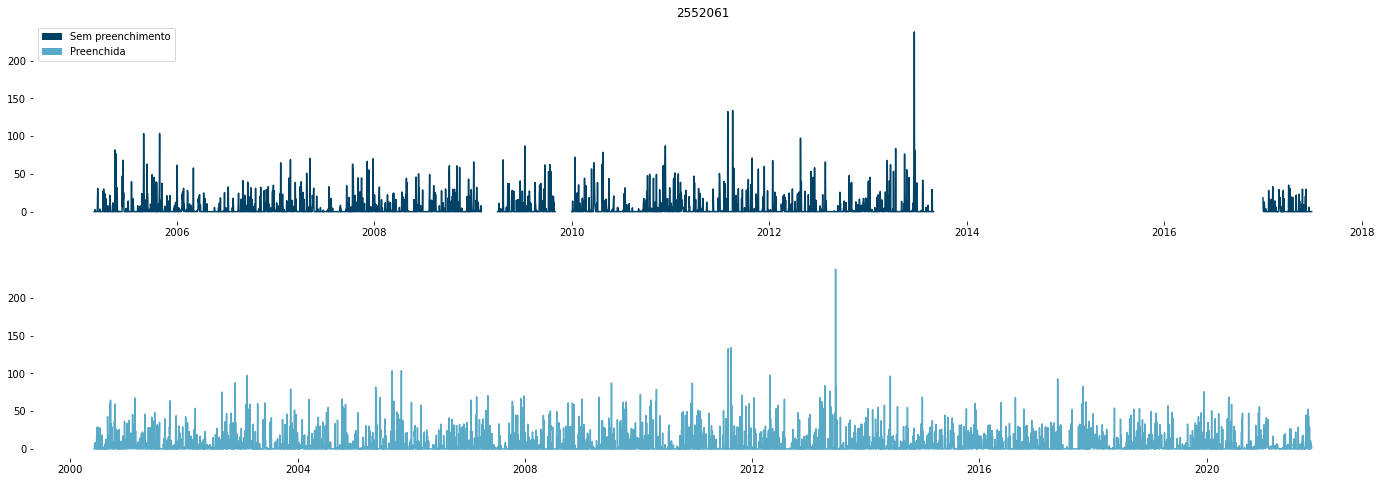

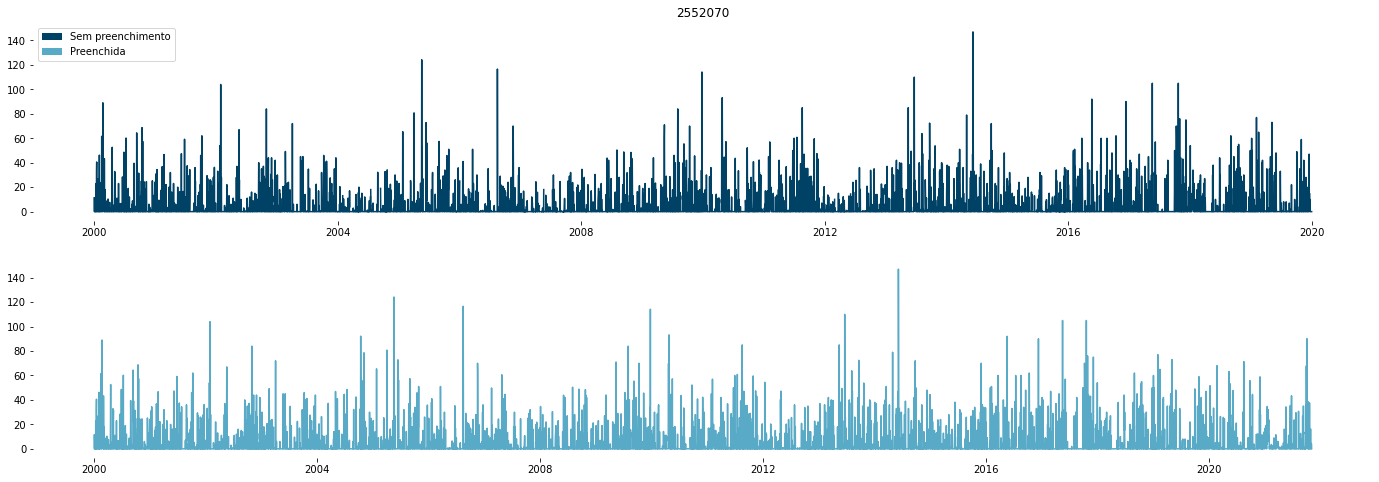

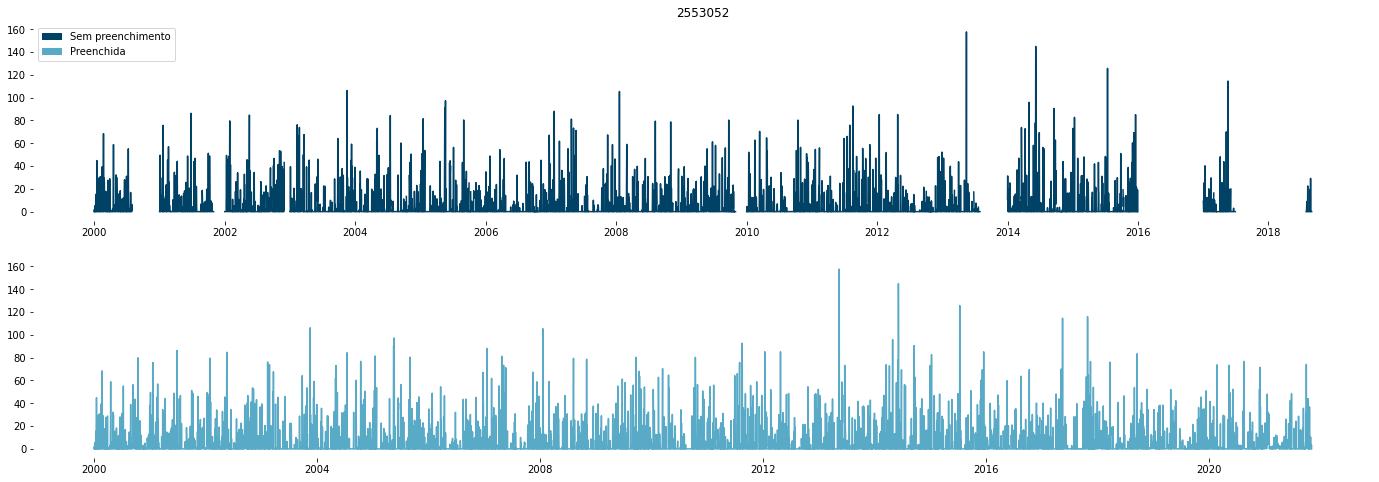

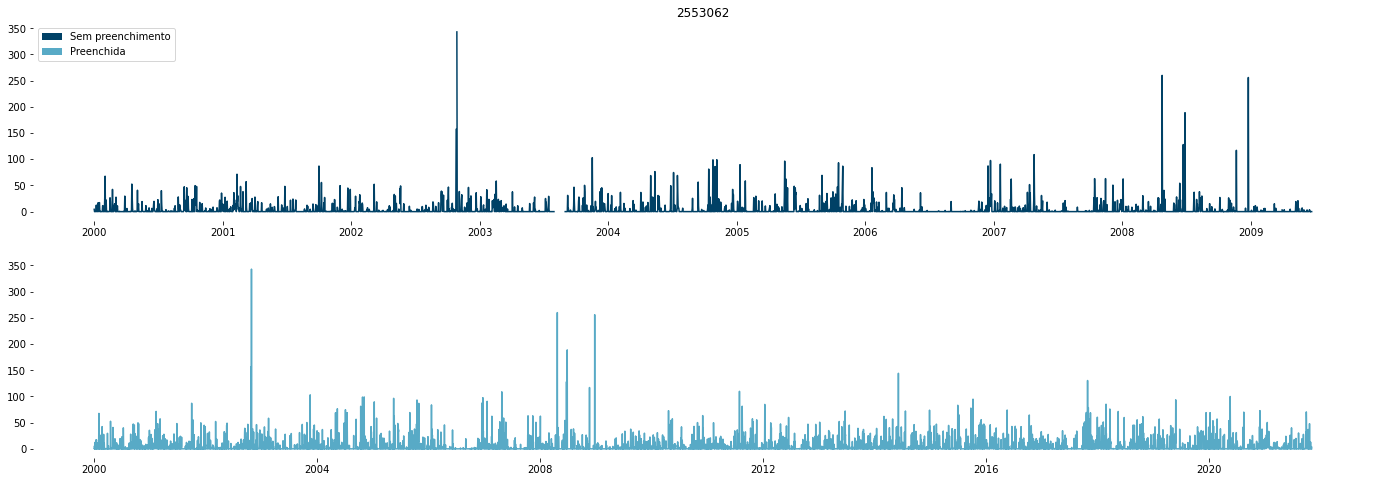

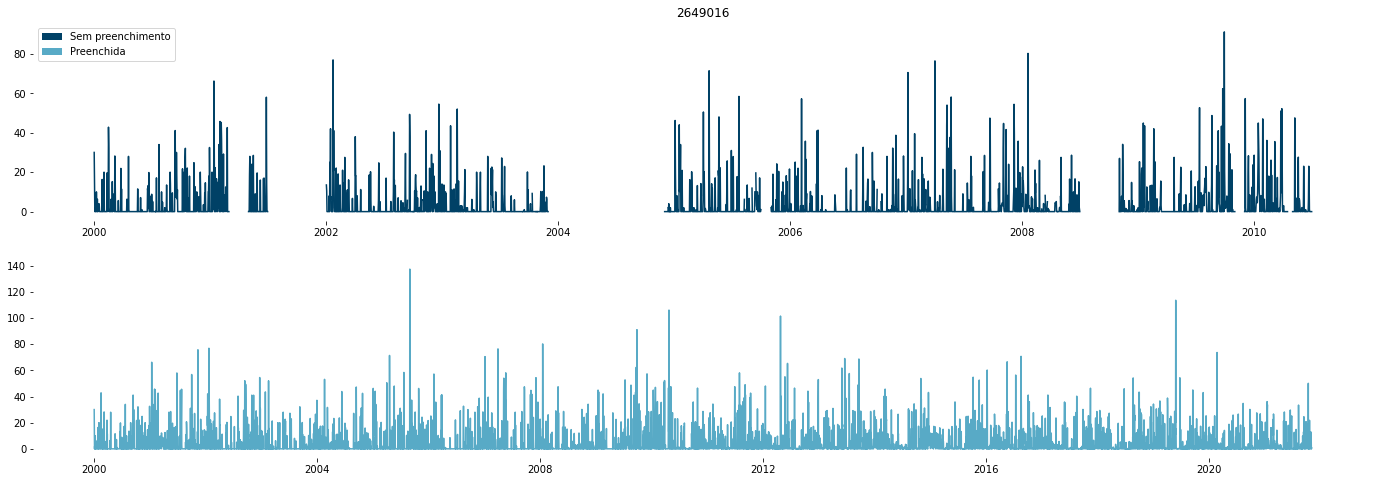

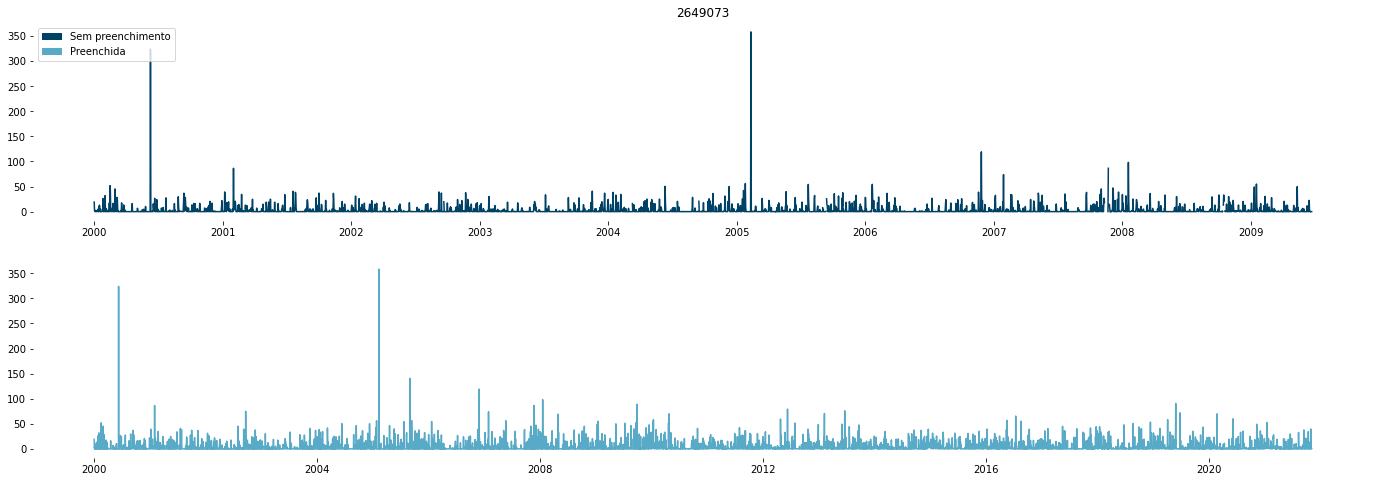

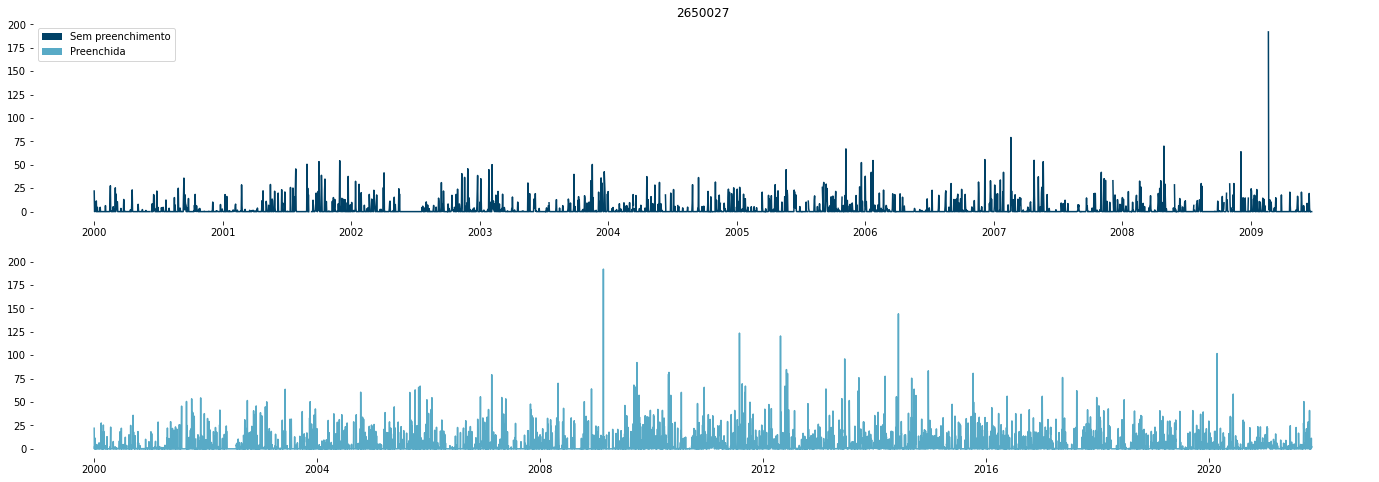

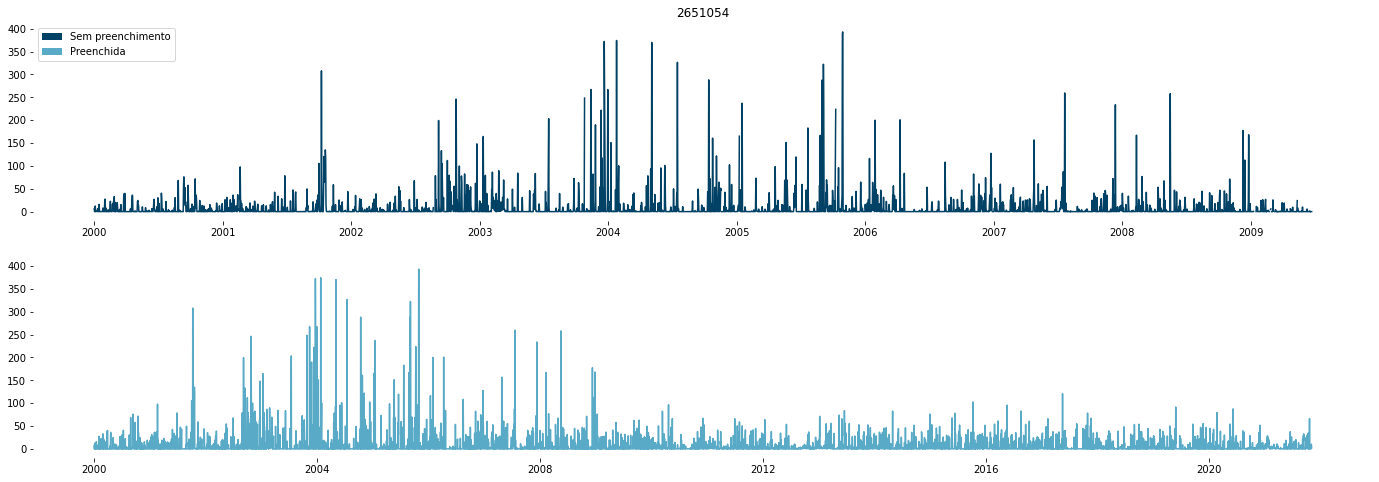

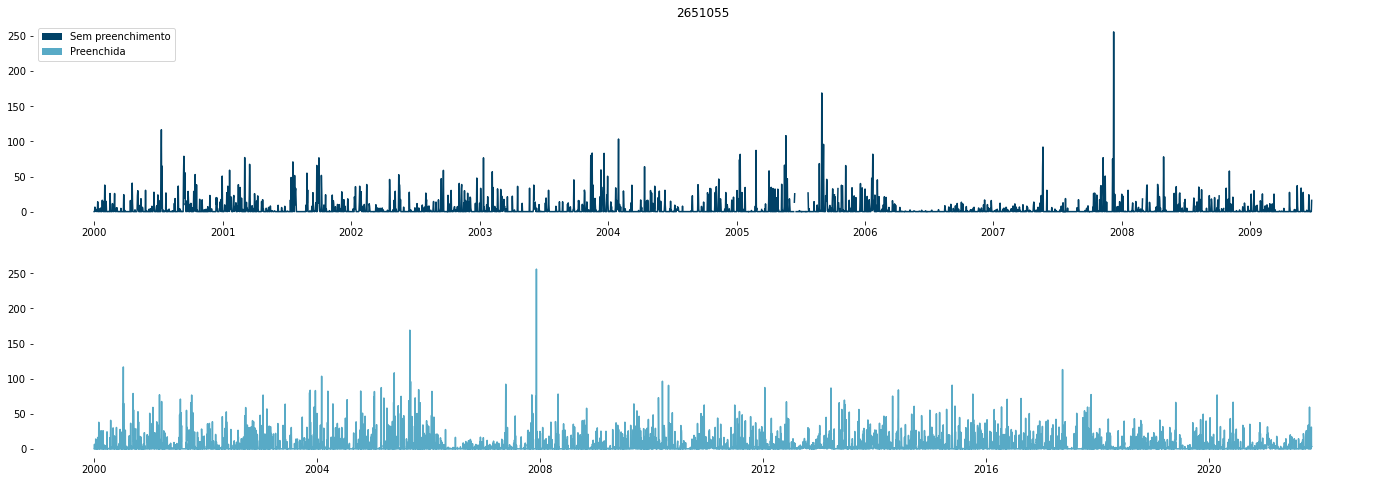

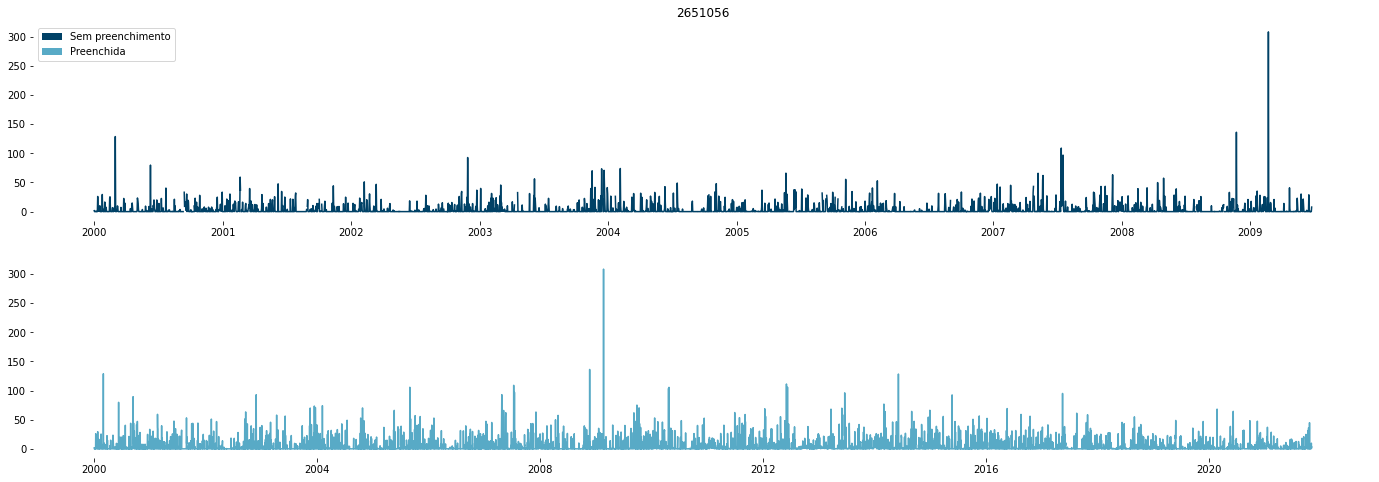

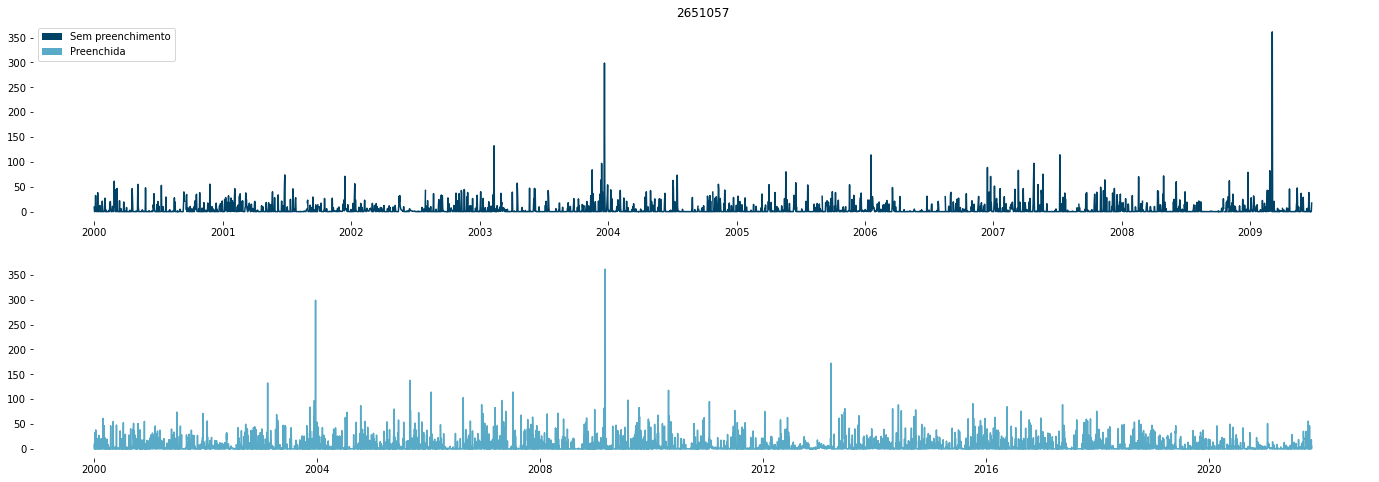

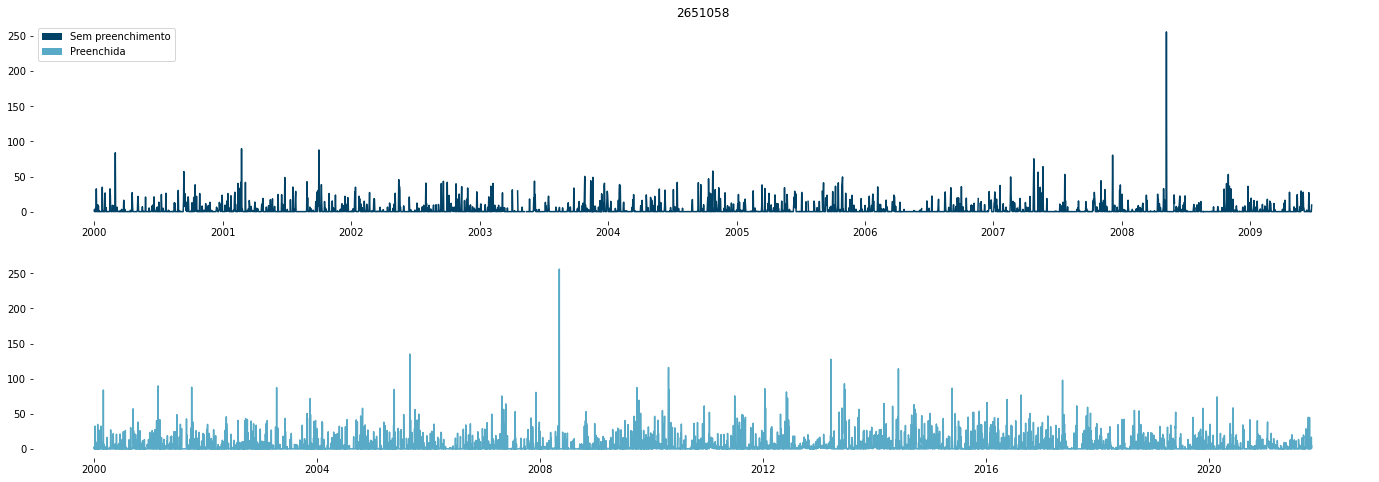

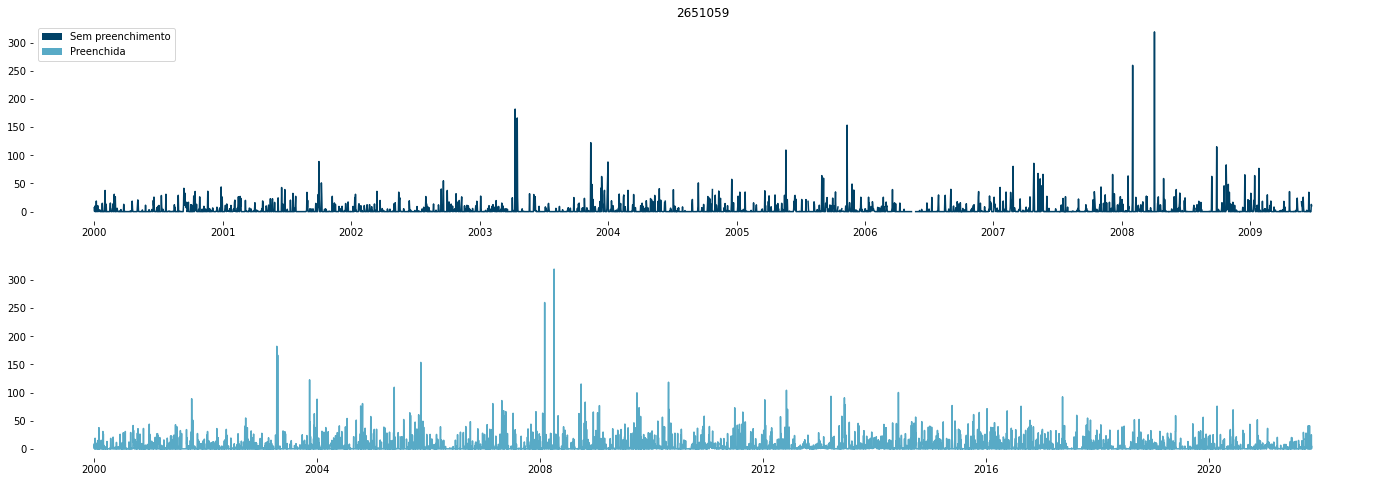

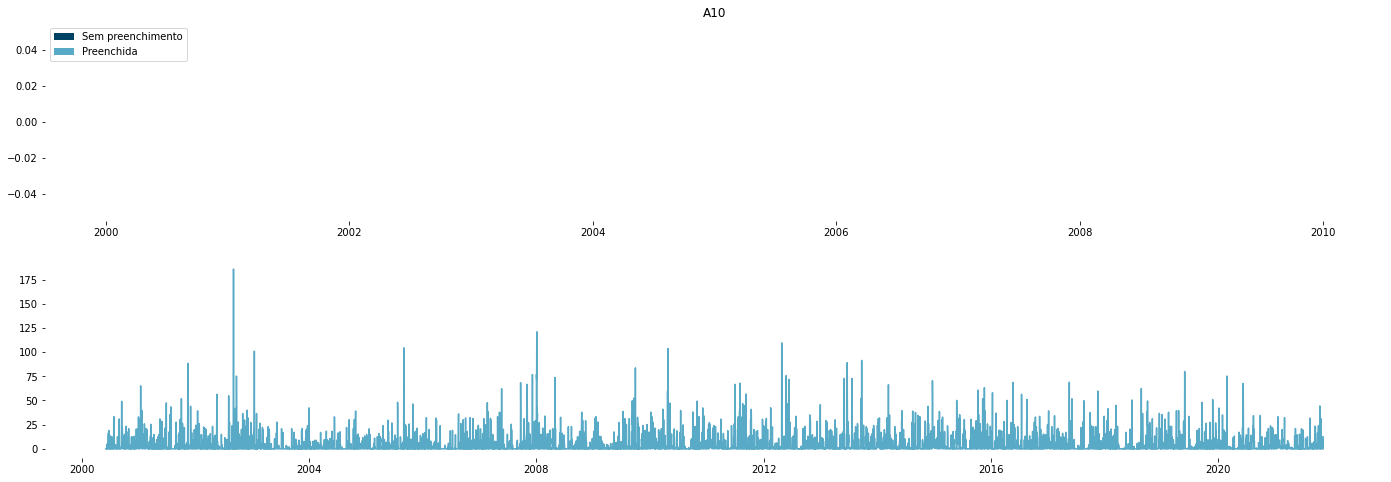

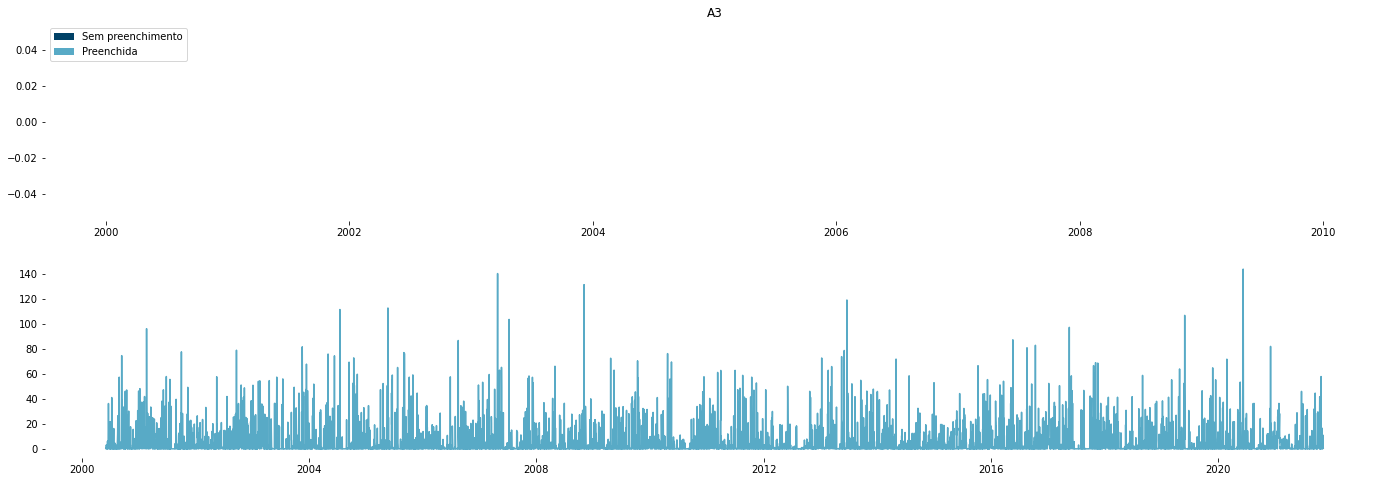

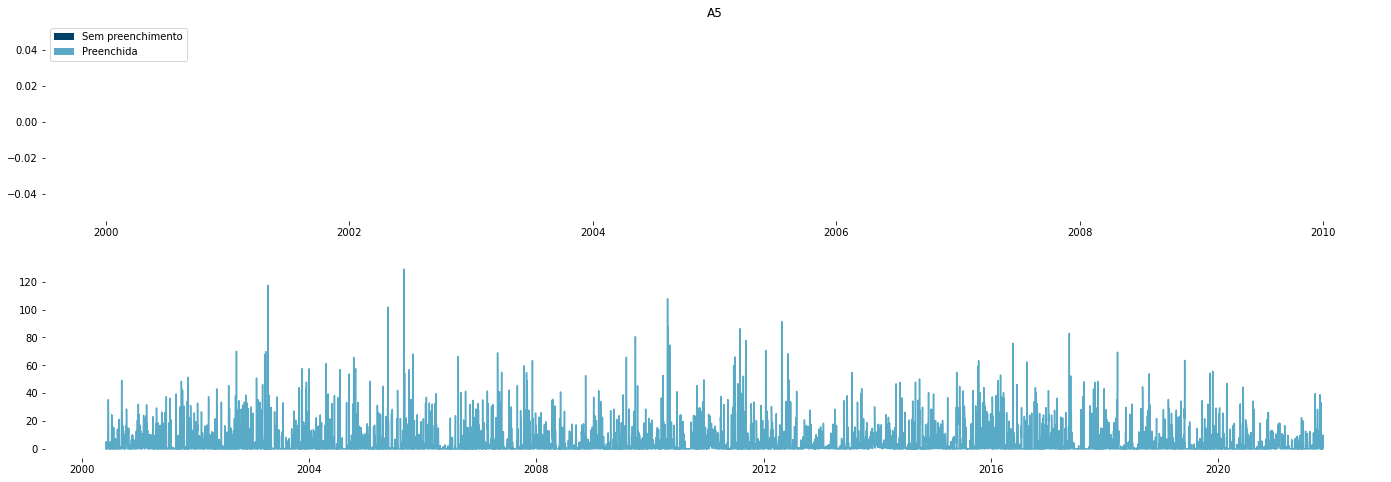

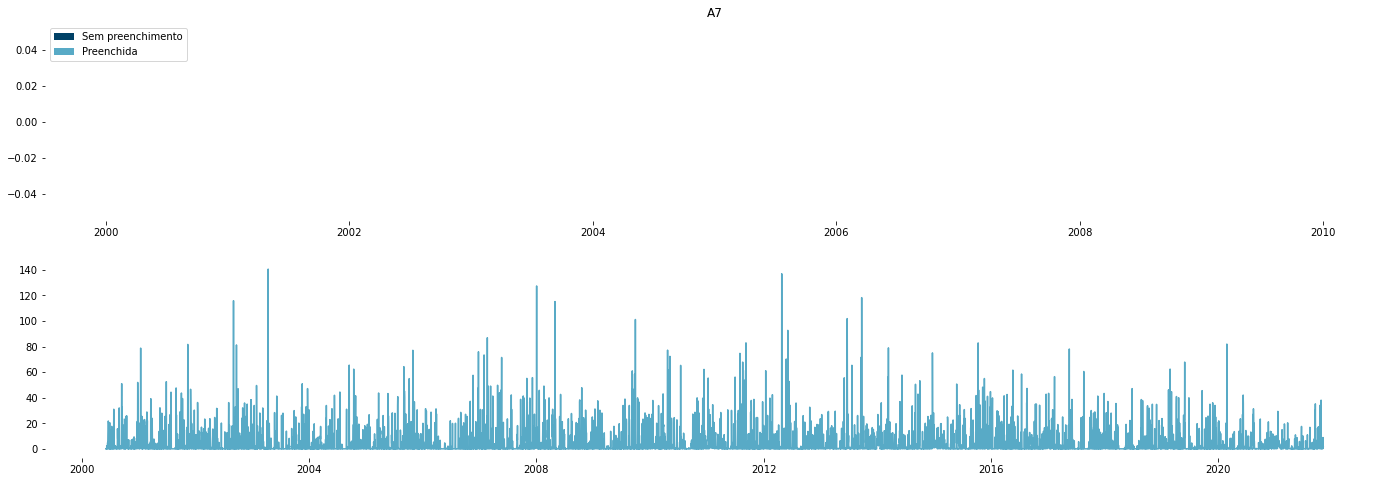

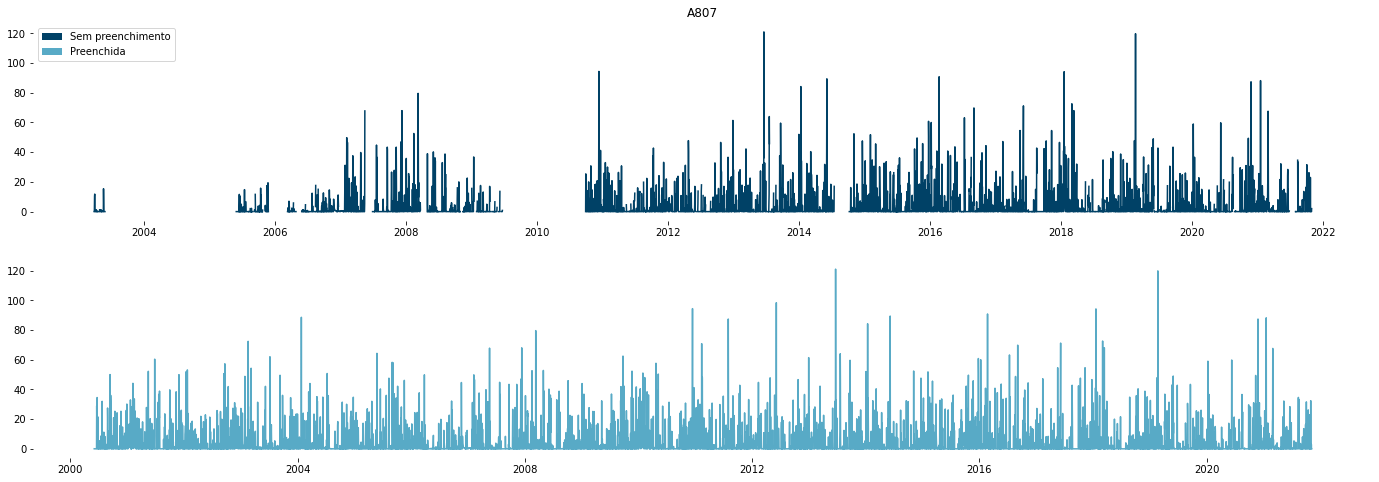

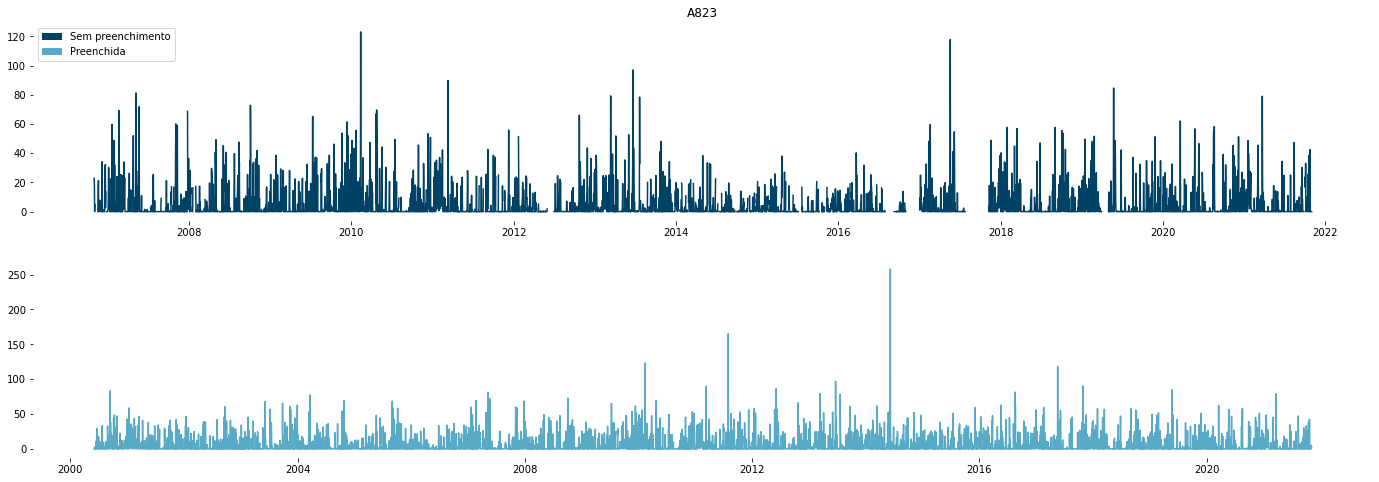

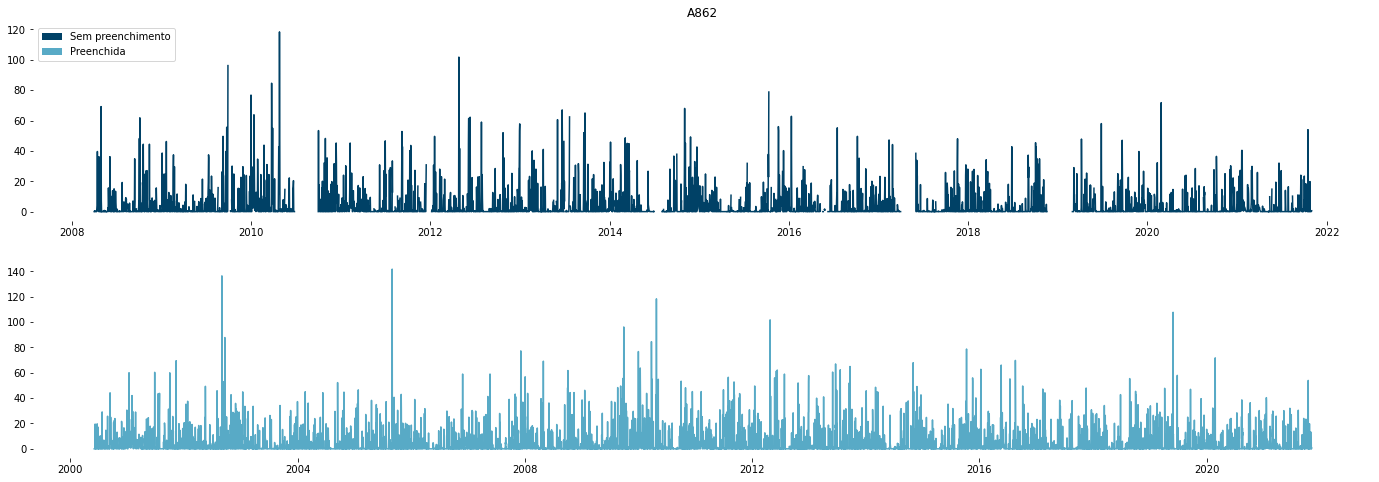

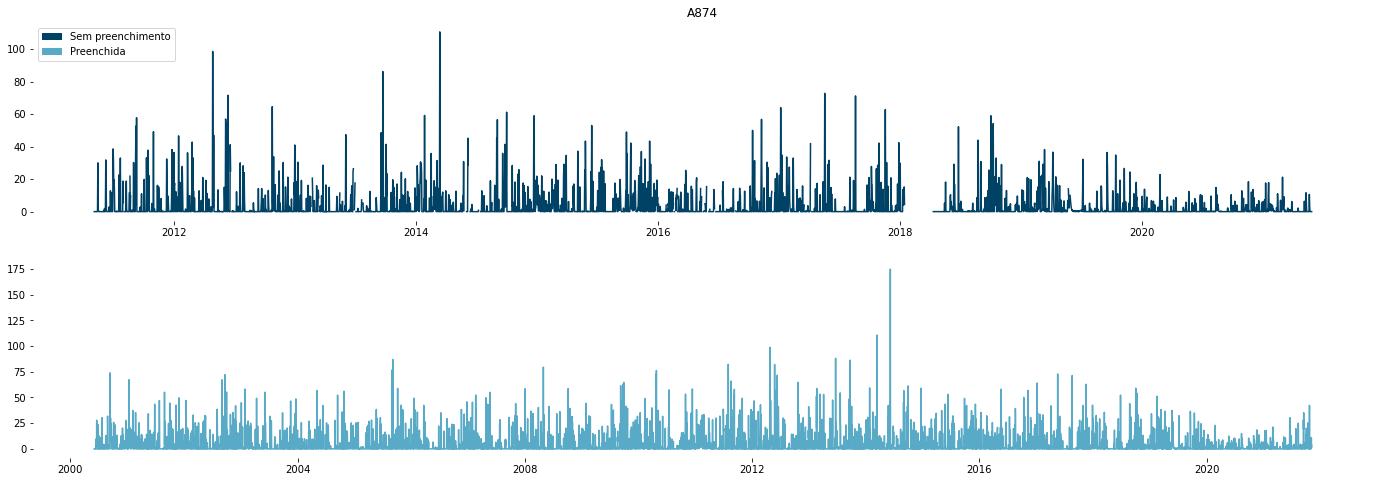

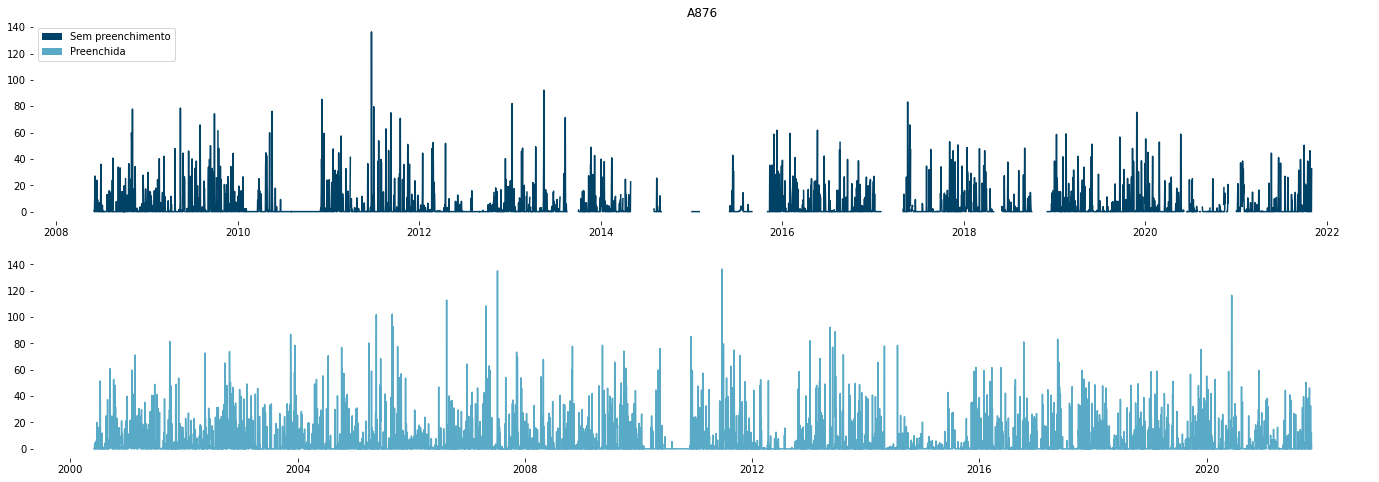

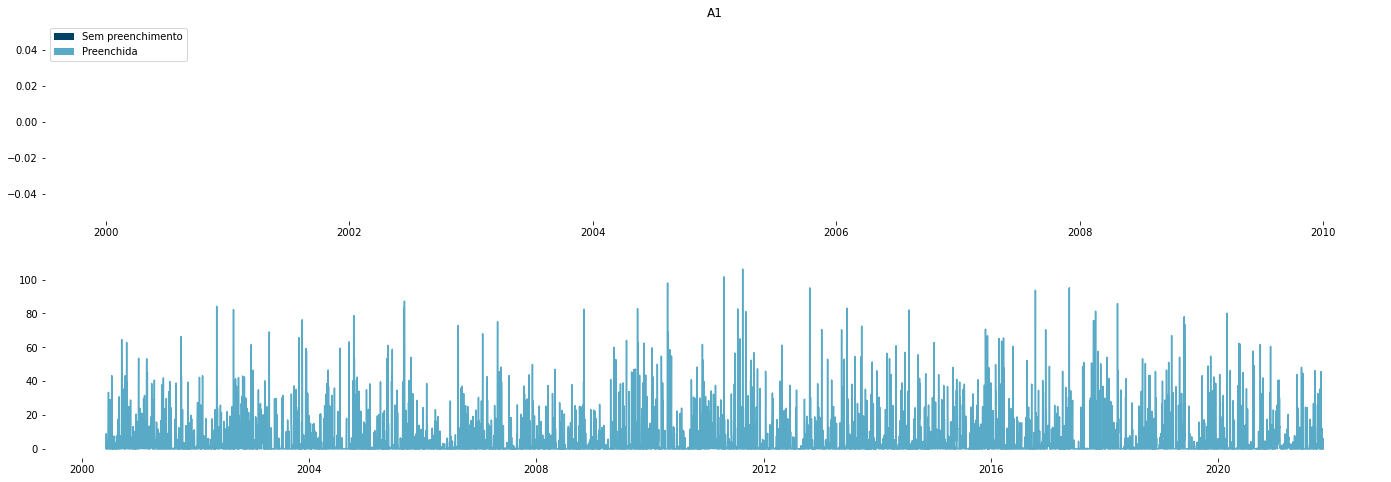

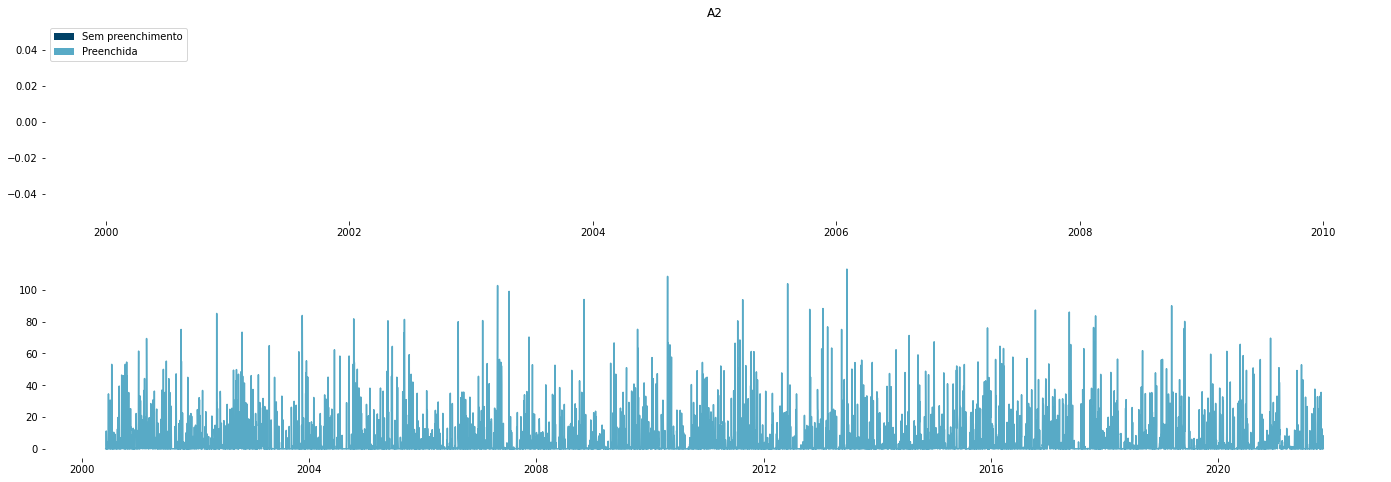

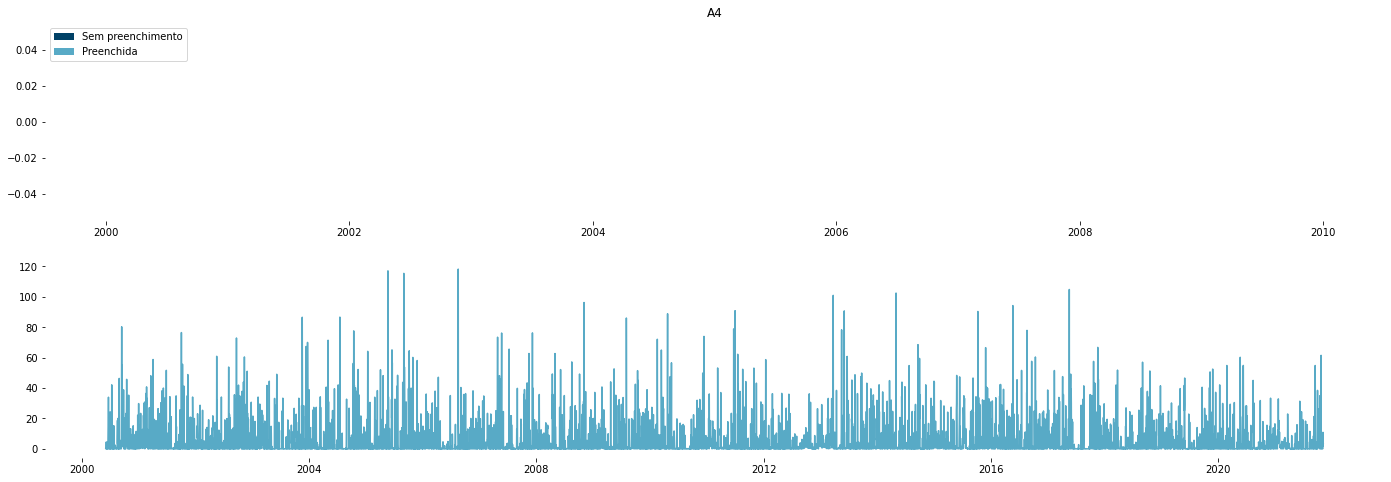

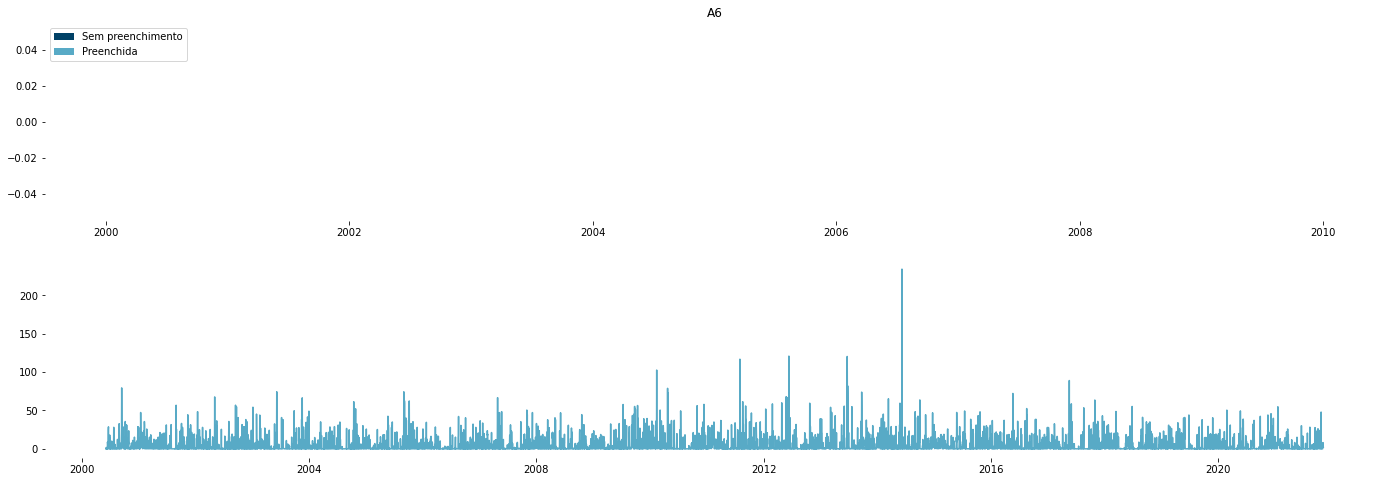

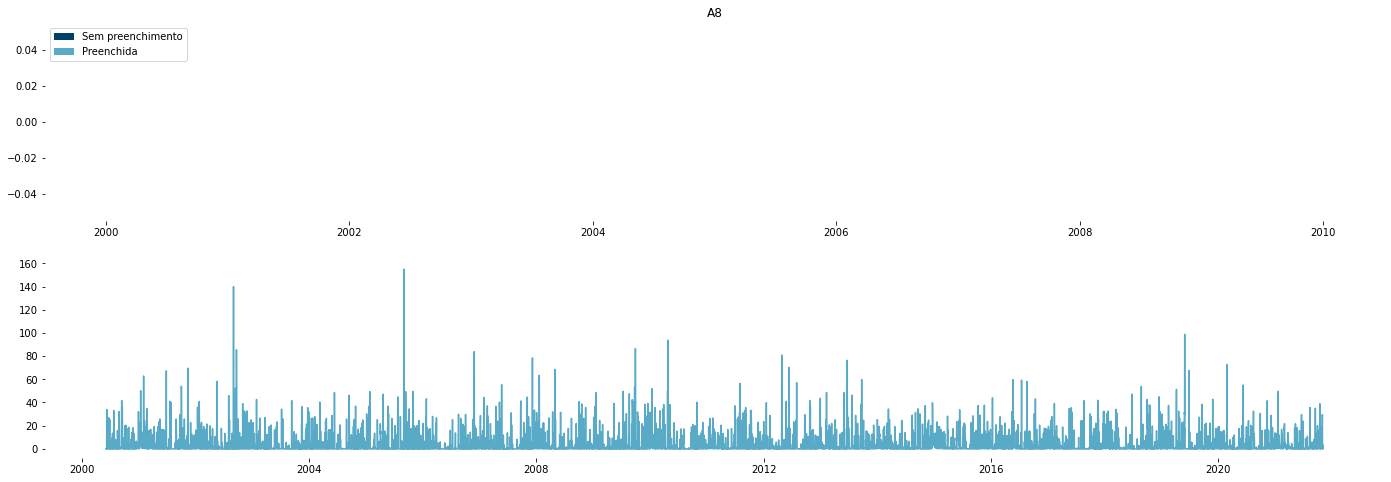

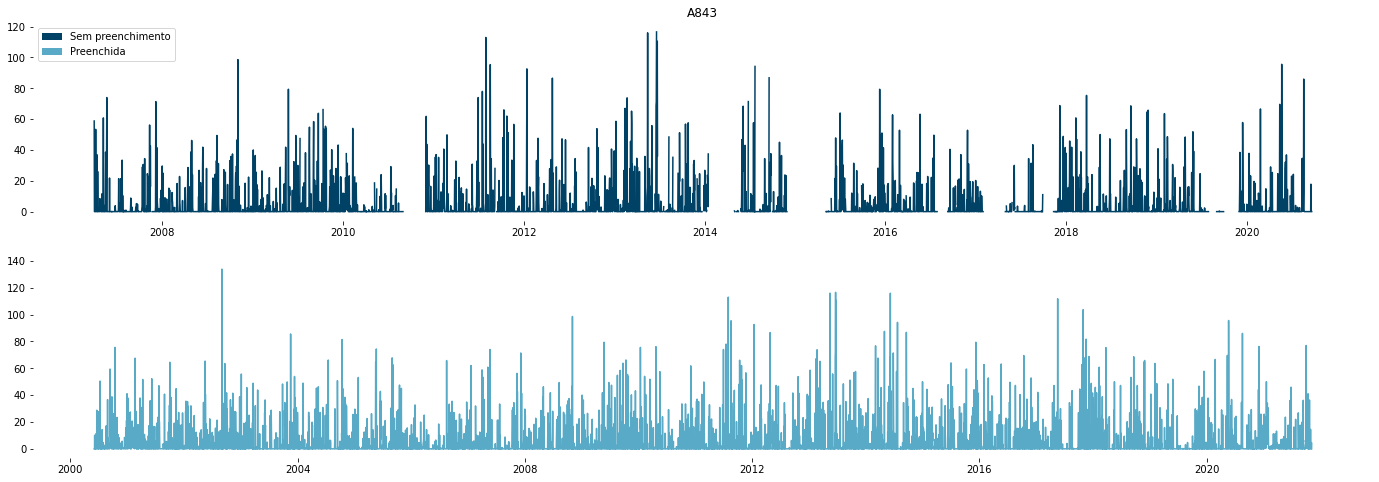

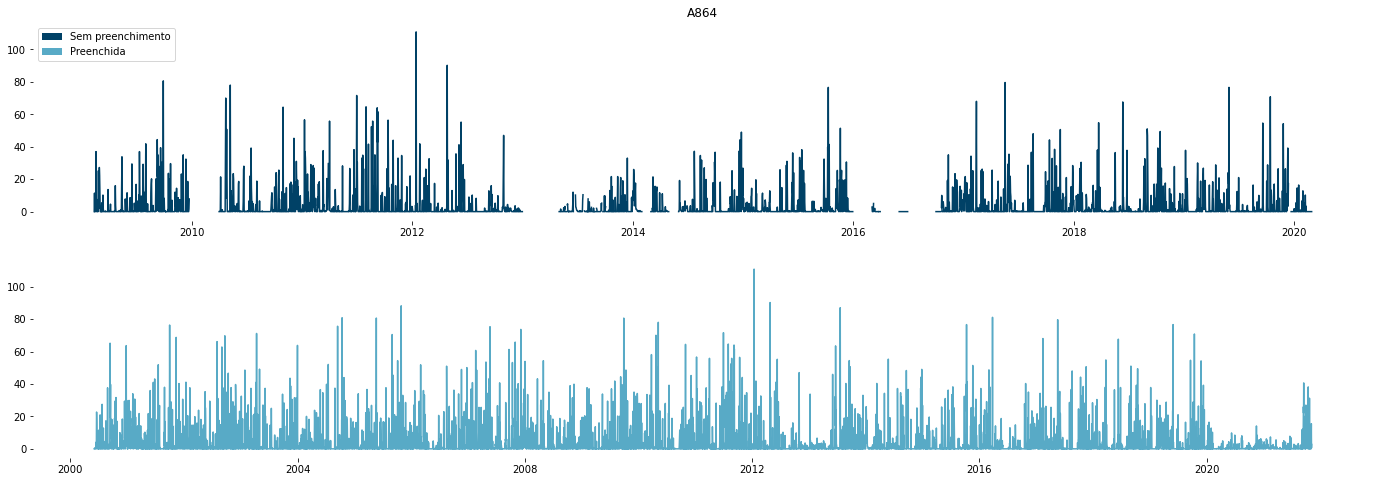

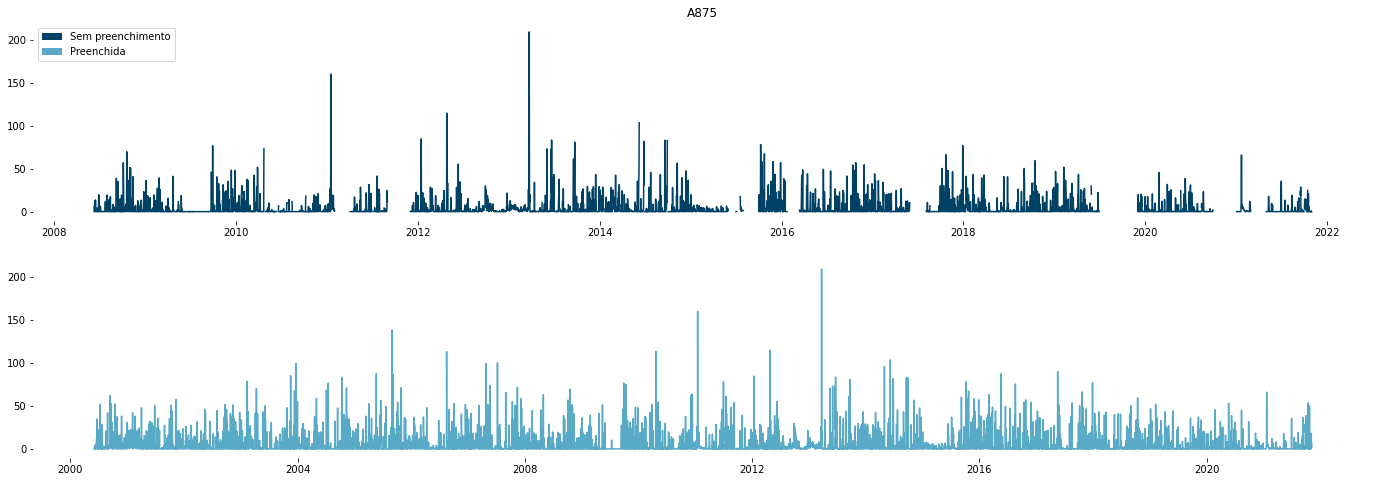

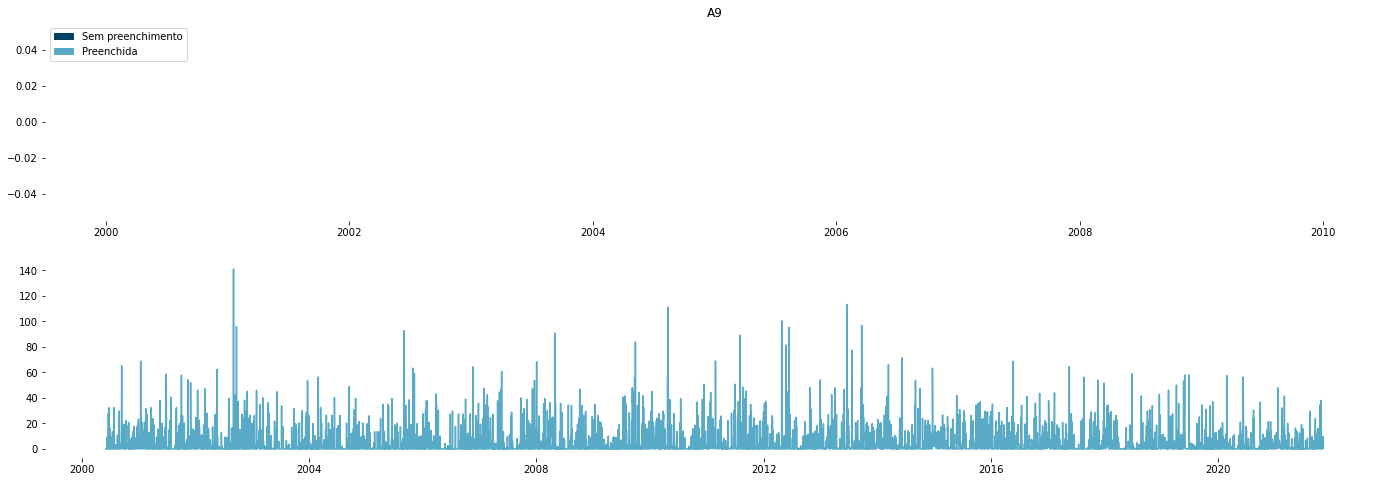

In [5]:
for serie_com_merge in series_com_merge:
    df = pd.read_csv(serie_com_merge, index_col=0)
    
    df.index = pd.to_datetime(df.index)

    codigo_posto = serie_com_merge.stem
    serie_posto = df[codigo_posto]
    serie_satelite = df['merge']

    serie_preenchida = serie_posto.combine_first(serie_satelite)
    serie_preenchida.to_csv(config.dir_final.joinpath(f"{codigo_posto}.csv"))

    fig, ax = plt.subplots(nrows=2, figsize=(24, 8))

    ax[0].plot(serie_posto, color="#004166")
    ax[1].plot(serie_preenchida, color="#58AAC6",)

    patches_legenda = [
        Patch(facecolor="#004166", label="Sem preenchimento",),
        Patch(facecolor="#58AAC6", label="Preenchida",),
    ]
    
    ax[0].set_title(f"{codigo_posto}")

    for key, spine in ax[0].spines.items():
        spine.set_visible(False)
    
    for key, spine in ax[1].spines.items():
        spine.set_visible(False)
    
    ax[0].legend(handles=patches_legenda, loc="upper left")